In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
import math
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import TomekLinks
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from sklearn import preprocessing


#### Reading the file 

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### Dropping "ID" column

In [3]:
# We should delete Customer ID because we don't want to get visualizations at customer level. That would lead to a lot of categories in the visualization
df.drop('id', inplace=True, axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [5]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)


In [7]:
df.shape

(5110, 11)

#### DATA CLEANING

In [8]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Replacing nAns with mean

In [9]:
df['bmi']=df['bmi'].replace(np.NaN,df['bmi'].mean())

In [10]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### The columns that are categorical:

In [11]:
categoricals=df.select_dtypes(include=object)
categoricals

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


#### The columns that are numericals:

In [12]:
numericals=df.select_dtypes(include=np.number)
numericals

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1
3,49.0,0,0,171.23,34.400000,1
4,79.0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0
5106,81.0,0,0,125.20,40.000000,0
5107,35.0,0,0,82.99,30.600000,0
5108,51.0,0,0,166.29,25.600000,0


#### EDA

In [13]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<Figure size 432x288 with 0 Axes>

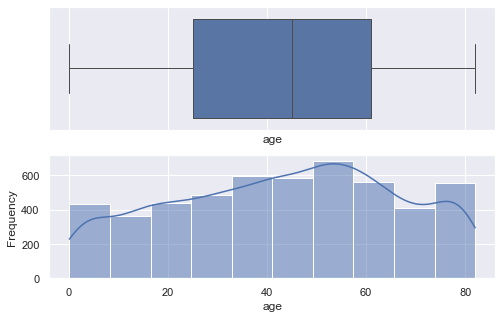

<Figure size 576x360 with 0 Axes>

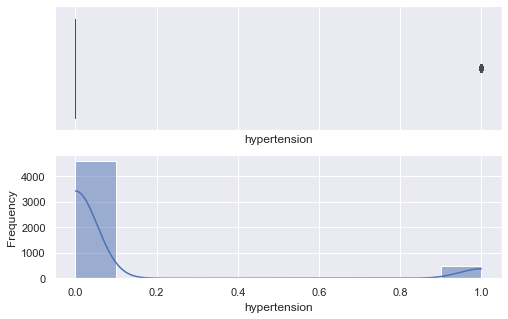

<Figure size 576x360 with 0 Axes>

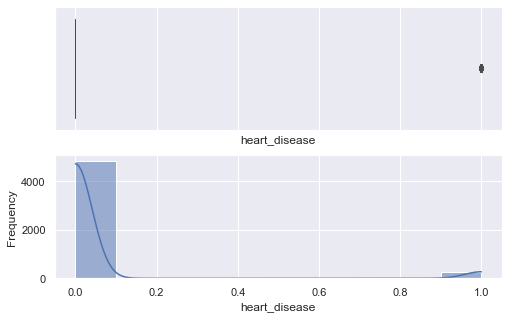

<Figure size 576x360 with 0 Axes>

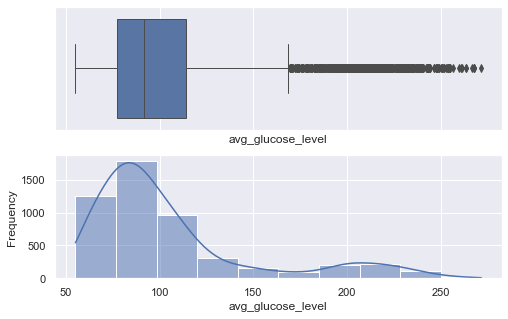

<Figure size 576x360 with 0 Axes>

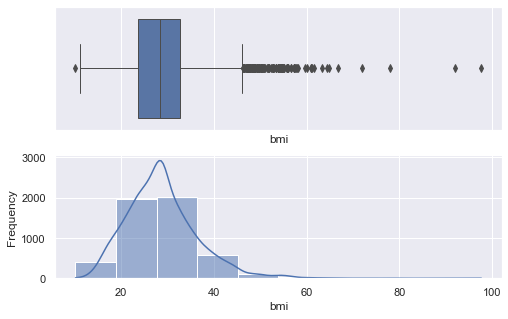

<Figure size 576x360 with 0 Axes>

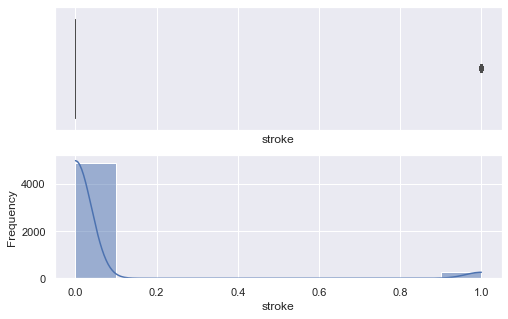

In [14]:
for i in numericals.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(numericals[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(numericals[i], ax=ax_hist , bins = 10,kde=True)  

Text(0.5, 1.0, 'Age Feature Show slight significance stroke = 1 within age groups 50-80')

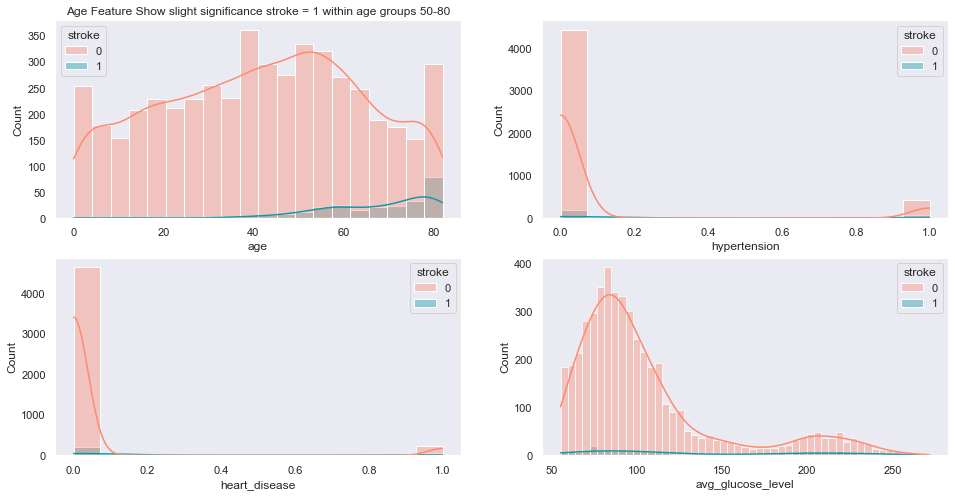

In [15]:
colors = ["#fe8a71", "#0e9aa7"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
fig_continous_var,axes = plt.subplots(2,2,figsize=(16,8))
continous_vars =['age','hypertension','heart_disease','avg_glucose_level', 'bmi']
for col,ax in zip(continous_vars,axes.ravel()) : 
    ax.grid()
    sns.histplot(df,x=col,kde=True,hue='stroke',alpha= 0.4,ax=ax)
axes[0][0].set_title(
    'Age Feature Show slight significance stroke = 1 within age groups 50-80'
)

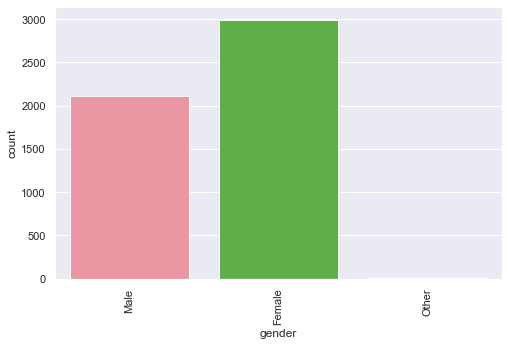

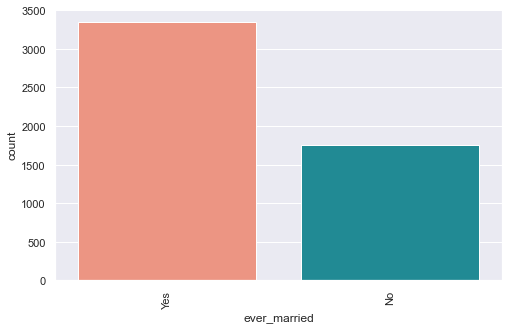

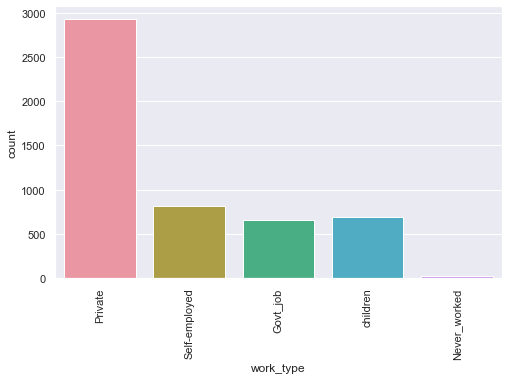

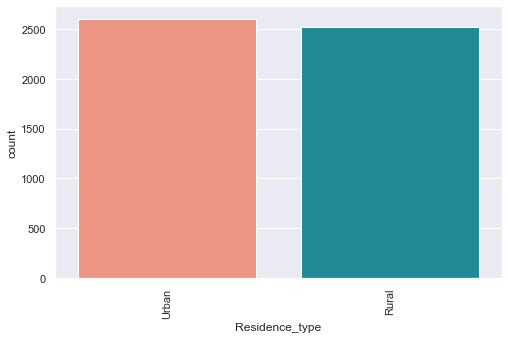

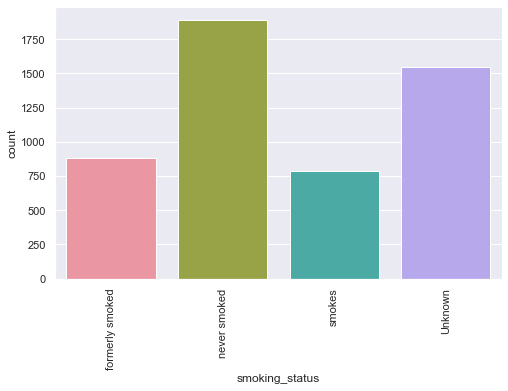

In [16]:
for i, col in enumerate(categoricals.columns):
    plt.figure(i)
    chart = sns.countplot(x=col, data=categoricals)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [17]:
df1 = pd.read_csv("healthcare-dataset-stroke-data.csv")

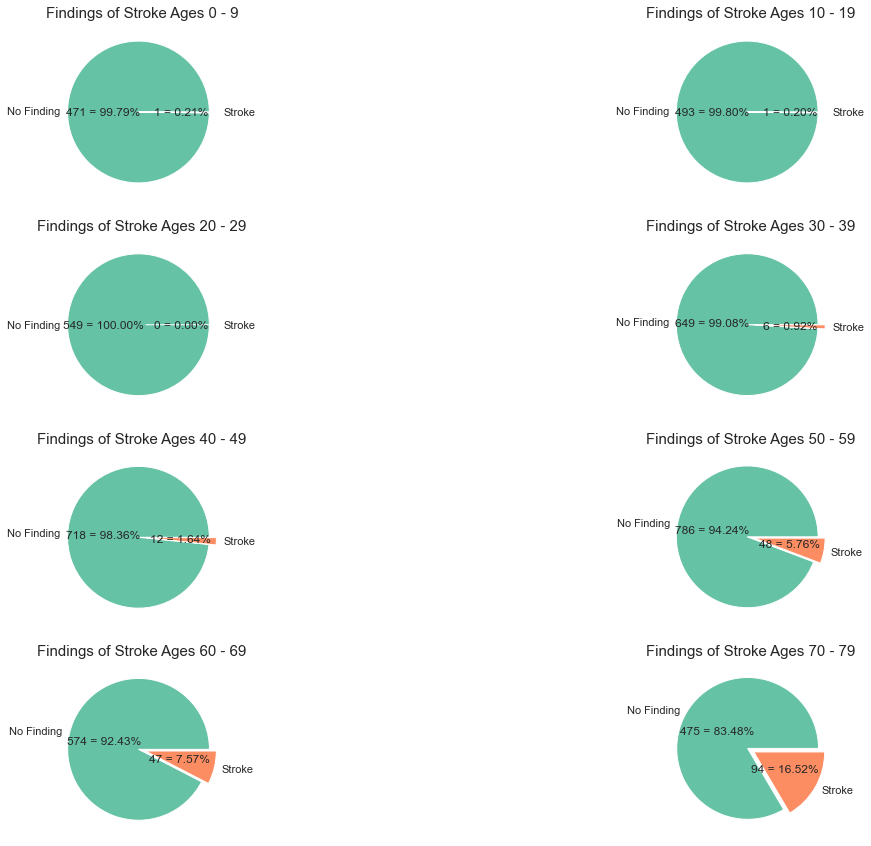

In [18]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))

sns.set_style('darkgrid')
sns.set_palette('Set2')

age_groups = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80)]
labels = ["Ages 0 - 9", "Ages 10 - 19", "Ages 20 - 29", "Ages 30 - 39", "Ages 40 - 49", "Ages 50 - 59", "Ages 60 - 69", "Ages 70 - 79"]
axs = axs.flatten()

for ag, age_group in enumerate(age_groups):
    data = [
        df1[(df1["stroke"] == 0) & (df1["age"] >= age_group[0]) & (df1["age"] < age_group[1])]["id"].count(),
        df1[(df1["stroke"] == 1) & (df1["age"] >= age_group[0]) & (df1["age"] < age_group[1])]["id"].count()
    ]

    label = ["No Finding", "Stroke"]
    _ = axs[ag].pie(
        data, labels=label,
        autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(data)/100, x),
        explode=[0.05] * 2, 
        pctdistance=0.5, 
        colors=sns.color_palette("Set2")[0:2],
    )
    _ = axs[ag].set_title("Findings of Stroke {}".format(labels[ag]), fontsize=15)

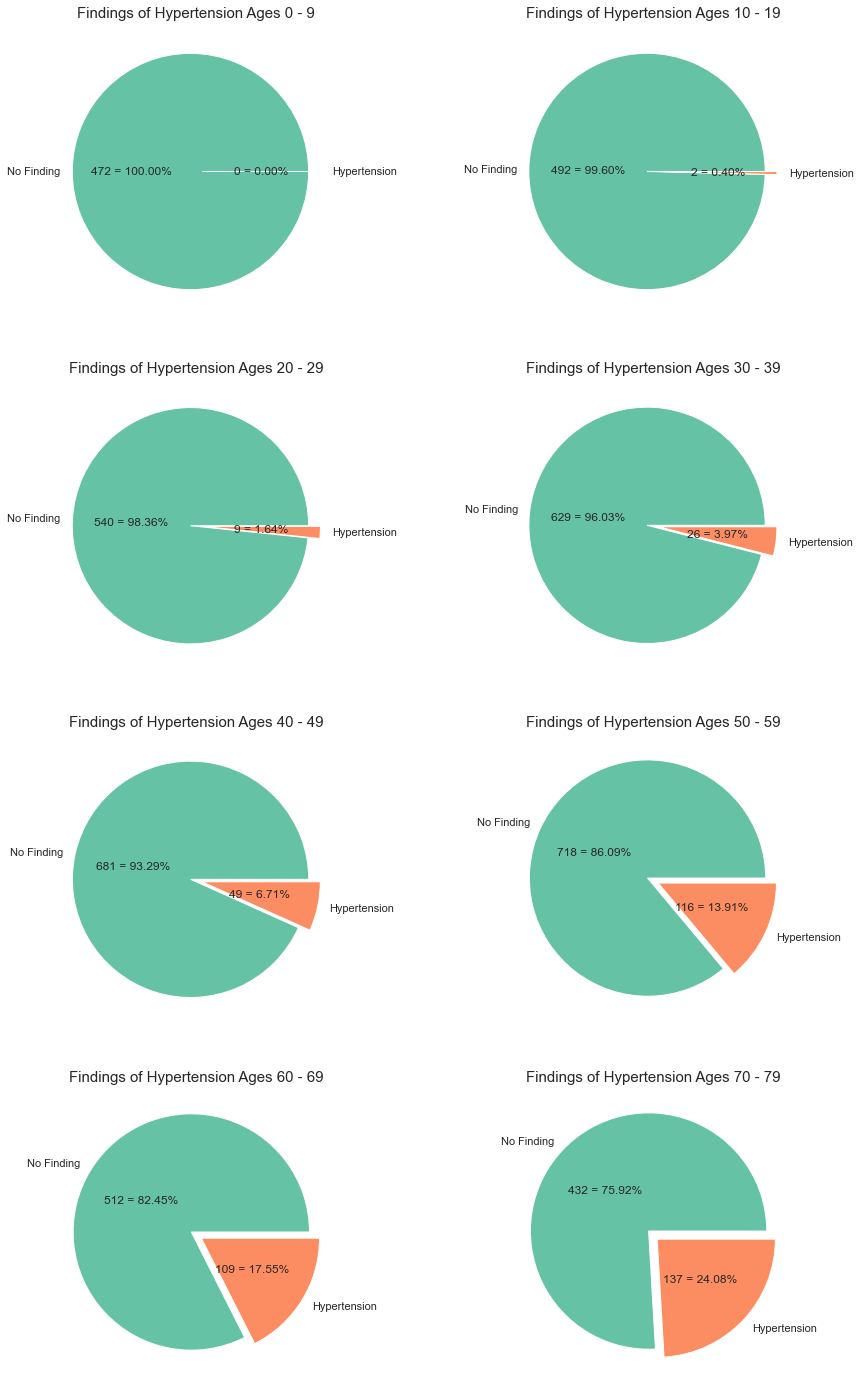

In [19]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 25))

sns.set_style('dark')
sns.set_palette('Set1')

age_groups = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80)]
labels = ["Ages 0 - 9", "Ages 10 - 19", "Ages 20 - 29", "Ages 30 - 39", "Ages 40 - 49", "Ages 50 - 59", "Ages 60 - 69", "Ages 70 - 79"]
axs = axs.flatten()

for ag, age_group in enumerate(age_groups):
    data = [
        df1[(df1["hypertension"] == 0) & (df1["age"] >= age_group[0]) & (df1["age"] < age_group[1])]["id"].count(),
        df1[(df1["hypertension"] == 1) & (df1["age"] >= age_group[0]) & (df1["age"] < age_group[1])]["id"].count()
    ]

    label = ["No Finding", "Hypertension"]
    _ = axs[ag].pie(
        data, labels=label,
        autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(data)/100, x),
        explode=[0.05] * 2, 
        pctdistance=0.5, 
        colors=sns.color_palette("Set2")[0:2],
    )
    _ = axs[ag].set_title("Findings of Hypertension {}".format(labels[ag]), fontsize=15)

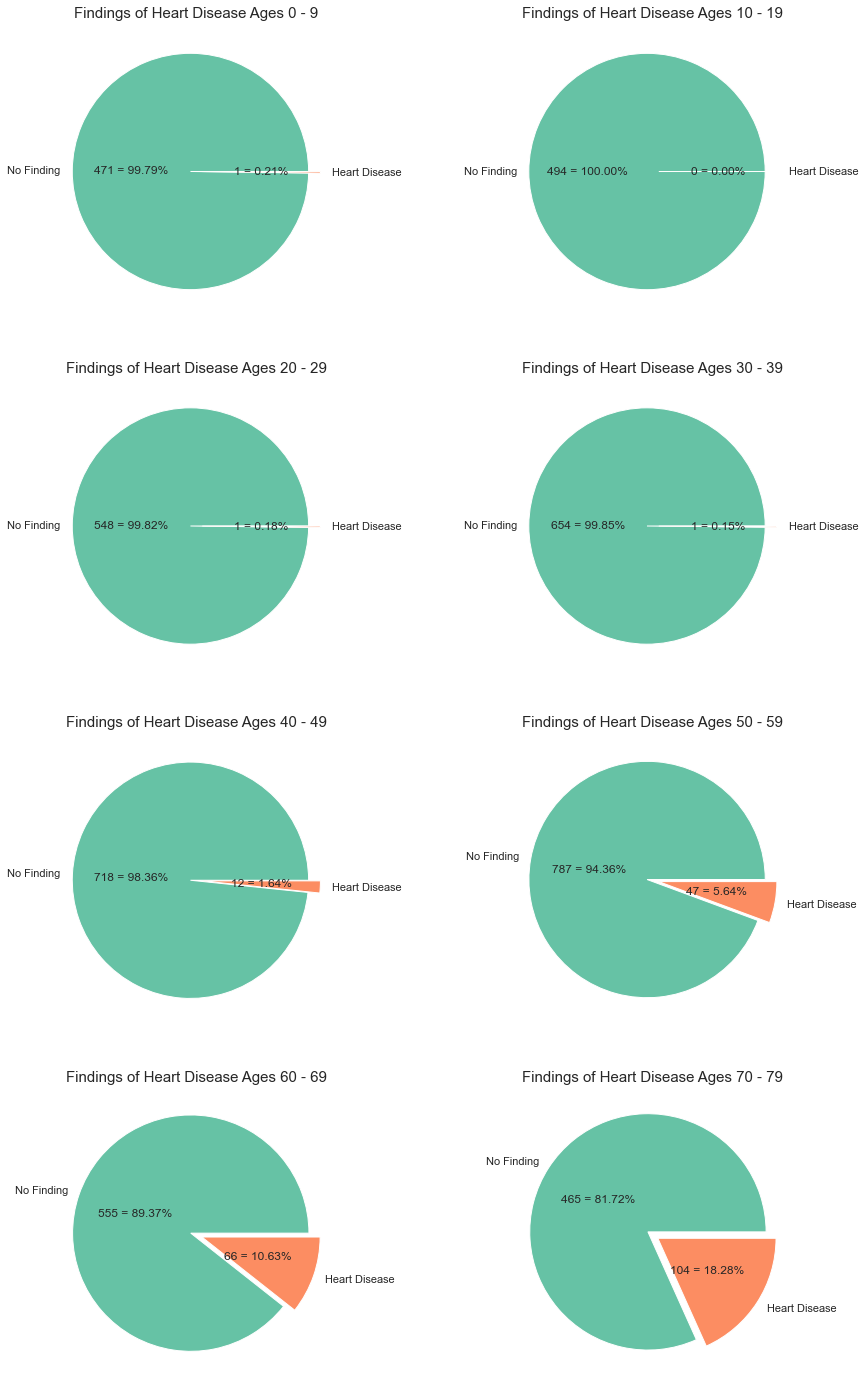

In [20]:
fig, axs = plt.subplots(nrows=4, ncols=2 , figsize=(15, 25))

sns.set_style('dark')
sns.set_palette('Set1')

age_groups = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80)]
labels = ["Ages 0 - 9", "Ages 10 - 19", "Ages 20 - 29", "Ages 30 - 39", "Ages 40 - 49", "Ages 50 - 59", "Ages 60 - 69", "Ages 70 - 79"]
axs = axs.flatten()

for ag, age_group in enumerate(age_groups):
    data = [
        df1[(df1["heart_disease"] == 0) & (df1["age"] >= age_group[0]) & (df1["age"] < age_group[1])]["id"].count(),
        df1[(df1["heart_disease"] == 1) & (df1["age"] >= age_group[0]) & (df1["age"] < age_group[1])]["id"].count()
    ]

    label = ["No Finding", "Heart Disease"]
    _ = axs[ag].pie(
        data, labels=label,
        autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(data)/100, x),
        explode=[0.05] * 2, 
        pctdistance=0.5, 
        colors=sns.color_palette("Set2")[0:2],
    )
    _ = axs[ag].set_title("Findings of Heart Disease {}".format(labels[ag]), fontsize=15)

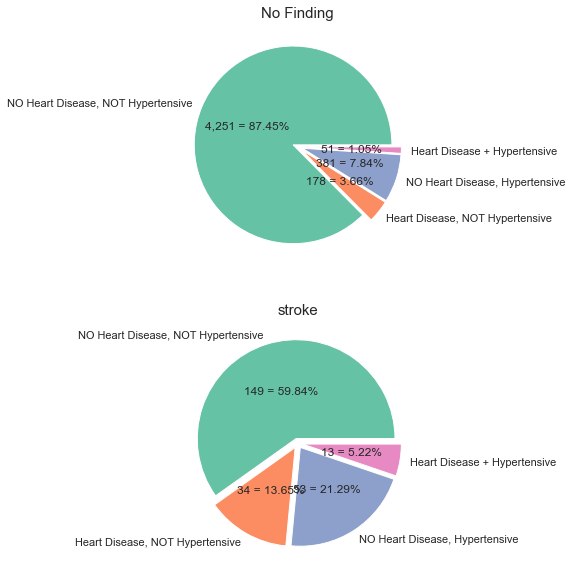

In [21]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

sns.set_style('darkgrid')
sns.set_palette('Set2')

axs = axs.flatten()

labels = ["NO Heart Disease, NOT Hypertensive", "Heart Disease, NOT Hypertensive", "NO Heart Disease, Hypertensive", "Heart Disease + Hypertensive"]
data = [
    df1[(df1["heart_disease"] == 0) & (df1["hypertension"] == 0) & (df1["stroke"] == 0)]["id"].count(),
    df1[(df1["heart_disease"] == 1) & (df1["hypertension"] == 0) & (df1["stroke"] == 0)]["id"].count(),
    df1[(df1["heart_disease"] == 0) & (df1["hypertension"] == 1) & (df1["stroke"] == 0)]["id"].count(),
    df1[(df1["heart_disease"] == 1) & (df1["hypertension"] == 1) & (df1["stroke"] == 0)]["id"].count()
]
_ = axs[0].pie(
    data, labels=labels,
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(data)/100, x),
    explode=[0.05] * 4, 
    pctdistance=0.5, 
    colors=sns.color_palette("Set2")[0:4],
)
_ = axs[0].set_title("No Finding", fontsize=15)

data = [
    df1[(df1["heart_disease"] == 0) & (df1["hypertension"] == 0) & (df1["stroke"] == 1)]["id"].count(),
    df1[(df1["heart_disease"] == 1) & (df1["hypertension"] == 0) & (df1["stroke"] == 1)]["id"].count(),
    df1[(df1["heart_disease"] == 0) & (df1["hypertension"] == 1) & (df1["stroke"] == 1)]["id"].count(),
    df1[(df1["heart_disease"] == 1) & (df1["hypertension"] == 1) & (df1["stroke"] == 1)]["id"].count()
]
_ = axs[1].pie(
    data, labels=labels,
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(data)/100, x),
    explode=[0.05] * 4, 
    pctdistance=0.5, 
    colors=sns.color_palette("Set2")[0:4],
)
_ = axs[1].set_title("stroke", fontsize=15)

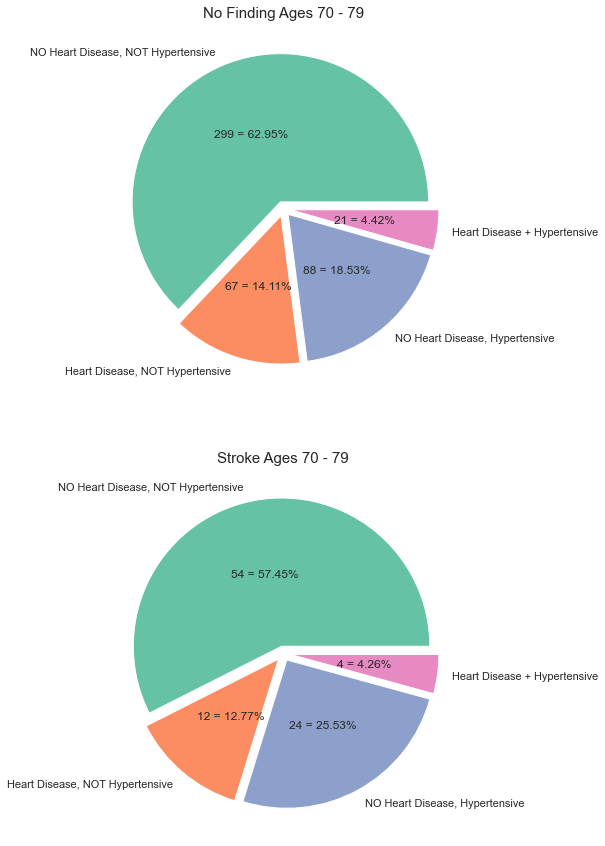

In [22]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

sns.set_style('darkgrid')
sns.set_palette('Set2')

axs = axs.flatten()

labels = ["NO Heart Disease, NOT Hypertensive", "Heart Disease, NOT Hypertensive", "NO Heart Disease, Hypertensive", "Heart Disease + Hypertensive"]
data = [
    df1[(df1["heart_disease"] == 0) & (df1["hypertension"] == 0) & (df1["stroke"] == 0) & (df1["age"] >= 70) & (df1["age"] < 80)]["id"].count(),
    df1[(df1["heart_disease"] == 1) & (df1["hypertension"] == 0) & (df1["stroke"] == 0) & (df1["age"] >= 70) & (df1["age"] < 80)]["id"].count(),
    df1[(df1["heart_disease"] == 0) & (df1["hypertension"] == 1) & (df1["stroke"] == 0) & (df1["age"] >= 70) & (df1["age"] < 80)]["id"].count(),
    df1[(df1["heart_disease"] == 1) & (df1["hypertension"] == 1) & (df1["stroke"] == 0) & (df1["age"] >= 70) & (df1["age"] < 80)]["id"].count()
]
_ = axs[0].pie(
    data, labels=labels,
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(data)/100, x),
    explode=[0.05] * 4, 
    pctdistance=0.5, 
    colors=sns.color_palette("Set2")[0:4],
)
_ = axs[0].set_title("No Finding Ages 70 - 79", fontsize=15)

data = [
    df1[(df1["heart_disease"] == 0) & (df1["hypertension"] == 0) & (df1["stroke"] == 1) & (df1["age"] >= 70) & (df1["age"] < 80)]["id"].count(),
    df1[(df1["heart_disease"] == 1) & (df1["hypertension"] == 0) & (df1["stroke"] == 1) & (df1["age"] >= 70) & (df1["age"] < 80)]["id"].count(),
    df1[(df1["heart_disease"] == 0) & (df1["hypertension"] == 1) & (df1["stroke"] == 1) & (df1["age"] >= 70) & (df1["age"] < 80)]["id"].count(),
    df1[(df1["heart_disease"] == 1) & (df1["hypertension"] == 1) & (df1["stroke"] == 1) & (df1["age"] >= 70) & (df1["age"] < 80)]["id"].count()
]
_ = axs[1].pie(
    data, labels=labels,
    autopct=lambda x: "{:,.0f} = {:.2f}%".format(x * sum(data)/100, x),
    explode=[0.05] * 4, 
    pctdistance=0.5, 
    colors=sns.color_palette("Set2")[0:4],
)
_ = axs[1].set_title("Stroke Ages 70 - 79", fontsize=15)

#### Multicolinearity

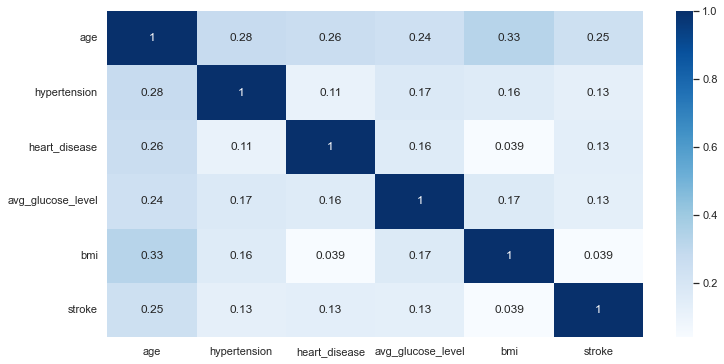

In [23]:
corr = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, cmap="Blues",annot=True)
plt.show()

#### Features correlation with target variable

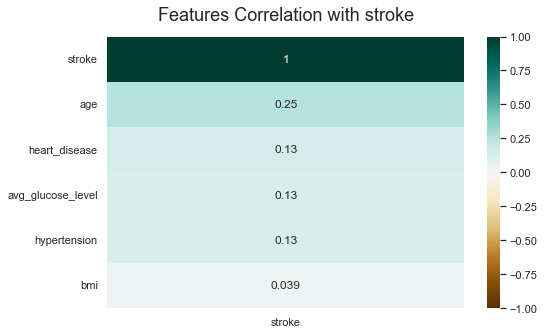

In [24]:
heatmap = sns.heatmap(df.corr()[['stroke']].sort_values(by='stroke', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlation with stroke', fontdict={'fontsize':18}, pad=16);

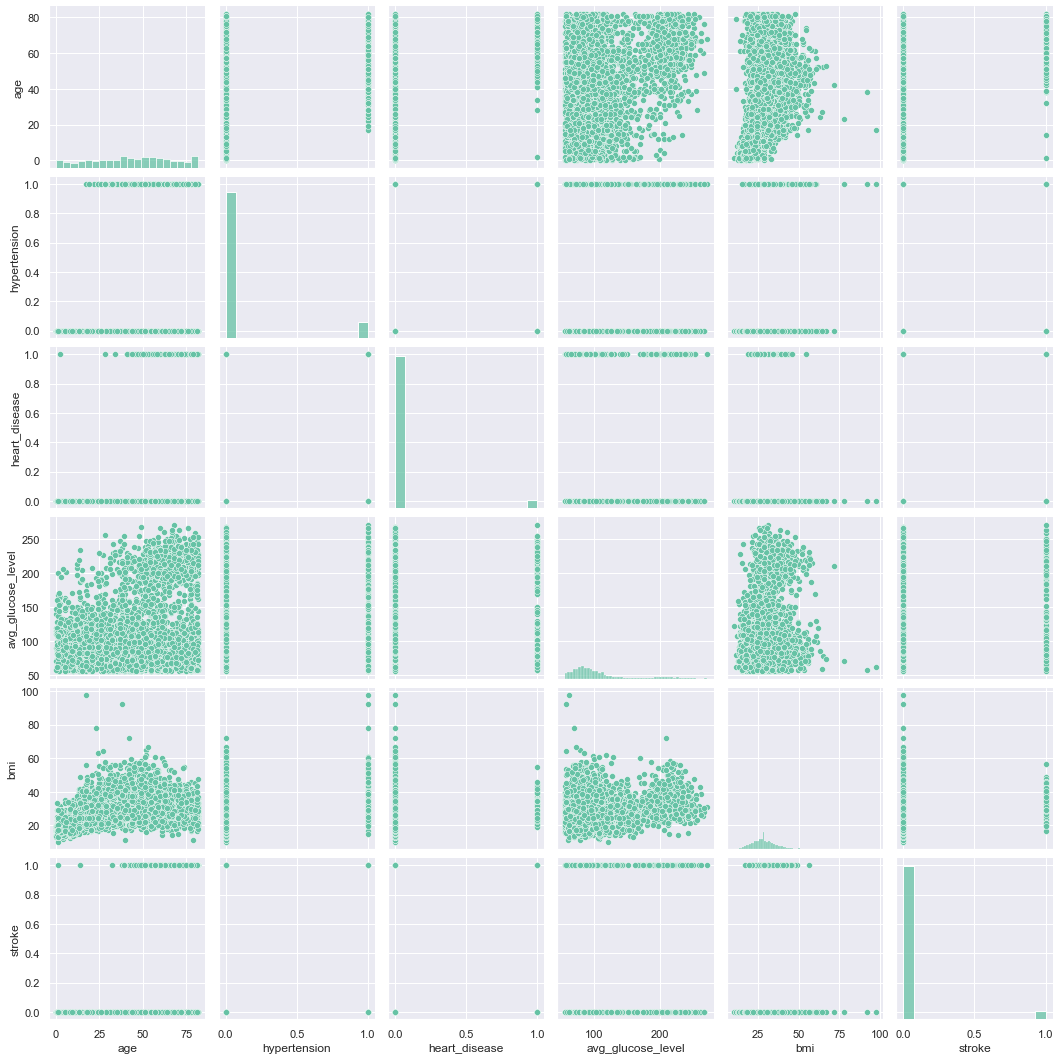

In [25]:
sns.pairplot(df)

#### Pre-Processing

<Figure size 576x360 with 0 Axes>

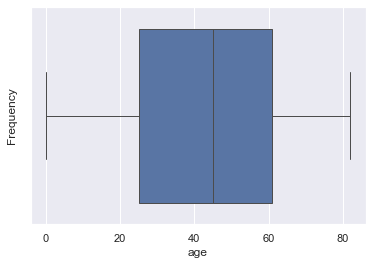

<Figure size 432x288 with 0 Axes>

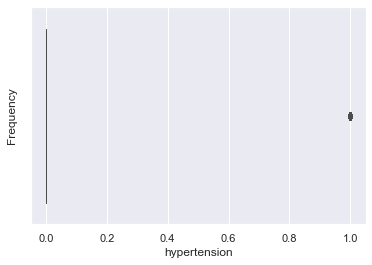

<Figure size 432x288 with 0 Axes>

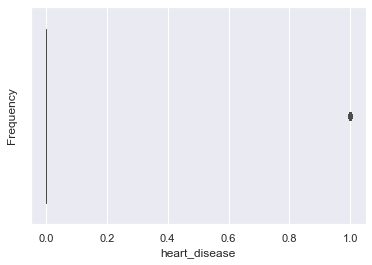

<Figure size 432x288 with 0 Axes>

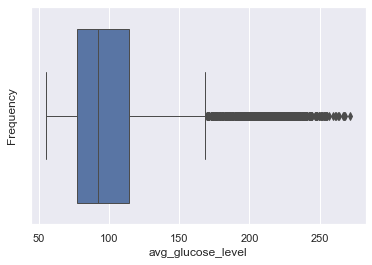

<Figure size 432x288 with 0 Axes>

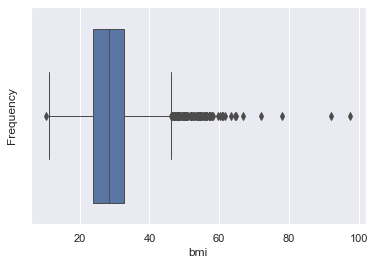

<Figure size 432x288 with 0 Axes>

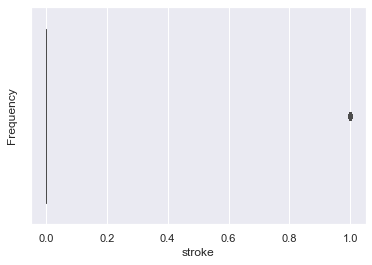

In [26]:
for i in numericals.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(6, 4)})
    f, (ax_box) = plt.subplots(1, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(numericals[i], ax=ax_box , linewidth= 1.0)

#### Encoding Categoricals

In [27]:
from sklearn.preprocessing import OneHotEncoder

encoder = encoder = OneHotEncoder().fit(categoricals)

encoded_categoricals = encoder.transform(categoricals).toarray()
encoded_categoricals = pd.DataFrame(encoded_categoricals)

#### Scalers

In [28]:
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()
scaler3 = PolynomialFeatures(degree=2, interaction_only=True) 

In [29]:
X = pd.concat([numericals, encoded_categoricals], axis = 1)
X = X.drop(['stroke'], axis = 1)
y = df['stroke']

In [30]:
y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

#### Split Train and test data set

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [32]:
pd.DataFrame(y).value_counts(normalize=True)

stroke
0         0.951272
1         0.048728
dtype: float64

In [33]:
pd.DataFrame(y_train).value_counts(normalize=True)

stroke
0         0.955898
1         0.044102
dtype: float64

In [34]:
pd.DataFrame(y_test).value_counts(normalize=True)

stroke
0         0.937402
1         0.062598
dtype: float64

#### LOGISTIC REGRESSION

In [35]:
#Fitting and transforming Data
X_train = scaler3.fit_transform(X_train)
X_test = scaler3.transform(X_test)

In [36]:
weights={0:1, 1:30}

In [37]:
# instantiate the model (with class_weight= dictionary )
logreg = LogisticRegression(class_weight=weights, random_state=42)

In [38]:
# fit the model with data
logreg.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 30}, random_state=42)

In [39]:
# Predictions
y_pred = logreg.predict(X_test)

In [40]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.70      0.82      1198
           1       0.16      0.84      0.26        80

    accuracy                           0.71      1278
   macro avg       0.57      0.77      0.54      1278
weighted avg       0.93      0.71      0.78      1278



In [41]:
print("Train Score : {}".format(logreg.score(X_train, y_train)))
print('Test Score : {}'.format(logreg.score(X_test, y_test)))

Train Score : 0.704070981210856
Test Score : 0.7057902973395931


In [42]:
# Example of Grid searching key hyperparametres for Logistic Regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# Define Dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# Define Models and Parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# Define Grid Search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=logreg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# Summarize Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.717384 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.716775 (0.018601) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.698507 (0.020196) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.713732 (0.020074) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.717384 (0.018703) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.699551 (0.022061) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.714947 (0.018480) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.715819 (0.017949) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.698333 (0.022076) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.714601 (0.018909) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.713036 (0.021496) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.700160 (0.019560) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.712078 (0.020146) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.708774 (0.022943) with

#### Hyperparameter on Logistic regression

In [43]:
#Fitting and transforming Data
X_train = scaler3.fit_transform(X_train)
X_test =  scaler3.transform(X_test)

In [44]:
weights={0:1, 1:30}

In [45]:
# Instantiate the model (with class_weight= dictionary )
logreg = LogisticRegression(class_weight=weights, random_state=42, C=10 , penalty='l2', solver= 'newton-cg')

In [46]:
# Fit the Model with Data
logreg.fit(X_train, y_train)

LogisticRegression(C=10, class_weight={0: 1, 1: 30}, random_state=42,
                   solver='newton-cg')

In [47]:
# Predictions
y_pred = logreg.predict(X_test)

In [48]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [49]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      1198
           1       0.12      0.44      0.19        80

    accuracy                           0.77      1278
   macro avg       0.54      0.62      0.53      1278
weighted avg       0.90      0.77      0.83      1278



In [50]:
print("Train Score : {}".format(logreg.score(X_train, y_train)))
print('Test Score : {}'.format(logreg.score(X_test, y_test)))

Train Score : 0.8191544885177453
Test Score : 0.7730829420970265


#### KNeighborsClassifier

In [51]:
X = pd.concat([numericals, encoded_categoricals], axis = 1)
X = X.drop(['stroke'], axis = 1)
y = df['stroke']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)

In [53]:
# Instance of the model with n_neighbors=4
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=4)  
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [54]:
print("Train Score : {}".format(classifier.score(X_train, y_train)))
print('Test Score : {}'.format(classifier.score(X_test, y_test)))

Train Score : 0.9557240704500979
Test Score : 0.9373776908023483


In [55]:
weights = {0:1, 1:30} #adding more weights to the 1
baseline_classification = LogisticRegression(max_iter=1000, class_weight=weights) 
classifier = KNeighborsClassifier(n_neighbors=25) 

In [56]:
def model_application(df, scaler, model, X_train, X_test, y_train, y_test): 
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    classifier.fit(X_train,y_train)
    print(classification_report(y_test, classifier.predict(X_test)))

In [57]:
sm = SMOTE(k_neighbors=3)

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

In [58]:
model_application(df, scaler1, classifier, X_train, X_test, y_train, y_test) 

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [59]:
model_application(df, scaler3, classifier, X_train_SMOTE, X_test, y_train_SMOTE, y_test)

              precision    recall  f1-score   support

           0       0.98      0.71      0.82       960
           1       0.15      0.77      0.24        62

    accuracy                           0.71      1022
   macro avg       0.56      0.74      0.53      1022
weighted avg       0.93      0.71      0.79      1022



#### Decision Trees

In [60]:
X = pd.concat([numericals, encoded_categoricals], axis = 1)
X = X.drop(['stroke'], axis = 1)
y = df['stroke']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)

In [62]:
X_train = scaler3.fit_transform(X_train)
X_test = scaler3.transform(X_test)

In [63]:
#### managing imbalance dataset
weights={0:1, 1:30}

In [64]:
# min_samples_leaf=50 allows to have more elements in the leaves, so less nodes and the tree is shallower.
classifier = DecisionTreeClassifier(min_samples_leaf=50, class_weight=weights)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 30}, min_samples_leaf=50)

In [65]:
classifier.get_depth()

10

#### Evaluation of the quality of the model.

In [66]:
y_pred = classifier.predict(X_test)

In [67]:
accuracy_train = classifier.score(X_train, y_train)
print(f"Accuracy on the training set: {accuracy_train:.0%}")

Accuracy on the training set: 73%


In [68]:
accuracy_test = classifier.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy_test:.0%}")

Accuracy on the test set: 74%


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84       960
           1       0.16      0.77      0.26        62

    accuracy                           0.74      1022
   macro avg       0.57      0.76      0.55      1022
weighted avg       0.93      0.74      0.81      1022



In [70]:
y_classifier_probabilities = classifier.predict_proba(X_test)

In [71]:
feature_names = X.columns
class_names = ['Yes', 'No']

In [77]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree



#### Random Forest

In [79]:
# import library
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(random_state=42)# fit predictor and target variable
X_train_SMOTE, y_train_SMOTE = rus.fit_resample(X_train, y_train)

In [80]:
X = pd.concat([numericals, encoded_categoricals], axis = 1)
X = X.drop(['stroke'], axis = 1)
y = df['stroke']

In [81]:
X_train = scaler3.fit_transform(X_train)
X_test = scaler3.transform(X_test)

In [88]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)
print("Number of rows X_train = {}".format(len(X_train_rf)))
print("Number of rows X_test = {}".format(len(X_test_rf)))
print("Number of rows y_train = {}".format(len(y_train_rf)))
print("Number of rows y_test = {}".format(len(y_test_rf)))
print("Percentage of train values = {}".format(round(len(X_train_rf)/len(X), 4) * 100),"%")

Number of rows X_train = 4088
Number of rows X_test = 1022
Number of rows y_train = 4088
Number of rows y_test = 1022
Percentage of train values = 80.0 %


In [89]:
classifier = RandomForestClassifier(n_estimators = 150, min_samples_split=30)
classifier.fit(X_train_rf, y_train_rf)

print("Train Score : {}".format(classifier.score(X_train_rf, y_train_rf)))
print('Test Score : {}'.format(classifier.score(X_test_rf, y_test_rf)))

Train Score : 0.9542563600782779
Test Score : 0.9393346379647749


In [90]:
weights = {0:1, 1:30}

classifier = RandomForestClassifier(n_estimators = 150, min_samples_split=30, class_weight= weights)
classifier.fit(X_train_rf, y_train_rf)

pred_train_rf = classifier.predict(X_train_rf)
pred_test_rf = classifier.predict(X_test_rf)

print(classification_report(y_test_rf, pred_test_rf))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       960
           1       0.22      0.52      0.31        62

    accuracy                           0.86      1022
   macro avg       0.59      0.70      0.62      1022
weighted avg       0.92      0.86      0.88      1022



#### Chi Square Test

In [91]:
import scipy.stats as stats

In [92]:
df['work_type_grouped'] = ['Private' if x  == 'Private' or x == 'Self-employed'  else 'Non-Private' for x in df1['work_type']]

compare = pd.crosstab(df['work_type_grouped'],df['stroke'])
print(compare)

stroke                0    1
work_type_grouped           
Non-Private        1331   35
Private            3530  214


In [93]:
chi2, p, dof, ex = stats.chi2_contingency(compare)

print(f'Chi_square value {chi2}\n\np value {p}\n\ndegrees of freedom {dof}\n\n expected {ex}')


Chi_square value 20.798018152535846

p value 5.103574885921948e-06

degrees of freedom 1

 expected [[1299.43757339   66.56242661]
 [3561.56242661  182.43757339]]
